In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('archive/minwage.csv')

In [4]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Department.Of.Labor.Cleaned.Low.Value.2020.Dollars"]].rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":name}))

min_wage_corr = act_min_wage.replace(0,np.nan).dropna(axis=1).corr()
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


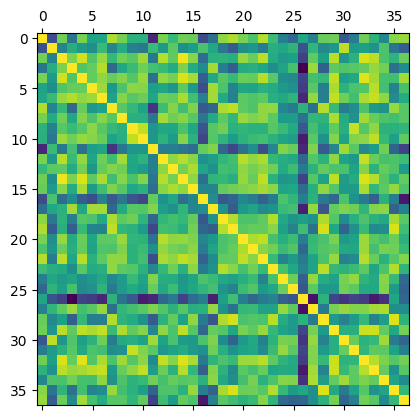

In [9]:
import matplotlib.pyplot as plt
plt.matshow(min_wage_corr)


[Text(0, 1, 'AL'),
 Text(1, 1, 'AR'),
 Text(2, 1, 'CA'),
 Text(3, 1, 'CO'),
 Text(4, 1, 'CO'),
 Text(5, 1, 'DE'),
 Text(6, 1, 'DI'),
 Text(7, 1, 'GU'),
 Text(8, 1, 'HA'),
 Text(9, 1, 'ID'),
 Text(10, 1, 'IN'),
 Text(11, 1, 'KE'),
 Text(12, 1, 'MA'),
 Text(13, 1, 'MA'),
 Text(14, 1, 'MA'),
 Text(15, 1, 'MI'),
 Text(16, 1, 'MI'),
 Text(17, 1, 'NE'),
 Text(18, 1, 'NE'),
 Text(19, 1, 'NE'),
 Text(20, 1, 'NE'),
 Text(21, 1, 'NE'),
 Text(22, 1, 'NE'),
 Text(23, 1, 'NO'),
 Text(24, 1, 'NO'),
 Text(25, 1, 'OH'),
 Text(26, 1, 'OK'),
 Text(27, 1, 'OR'),
 Text(28, 1, 'PE'),
 Text(29, 1, 'RH'),
 Text(30, 1, 'SO'),
 Text(31, 1, 'UT'),
 Text(32, 1, 'VE'),
 Text(33, 1, 'WA'),
 Text(34, 1, 'WE'),
 Text(35, 1, 'WI'),
 Text(36, 1, 'WY')]

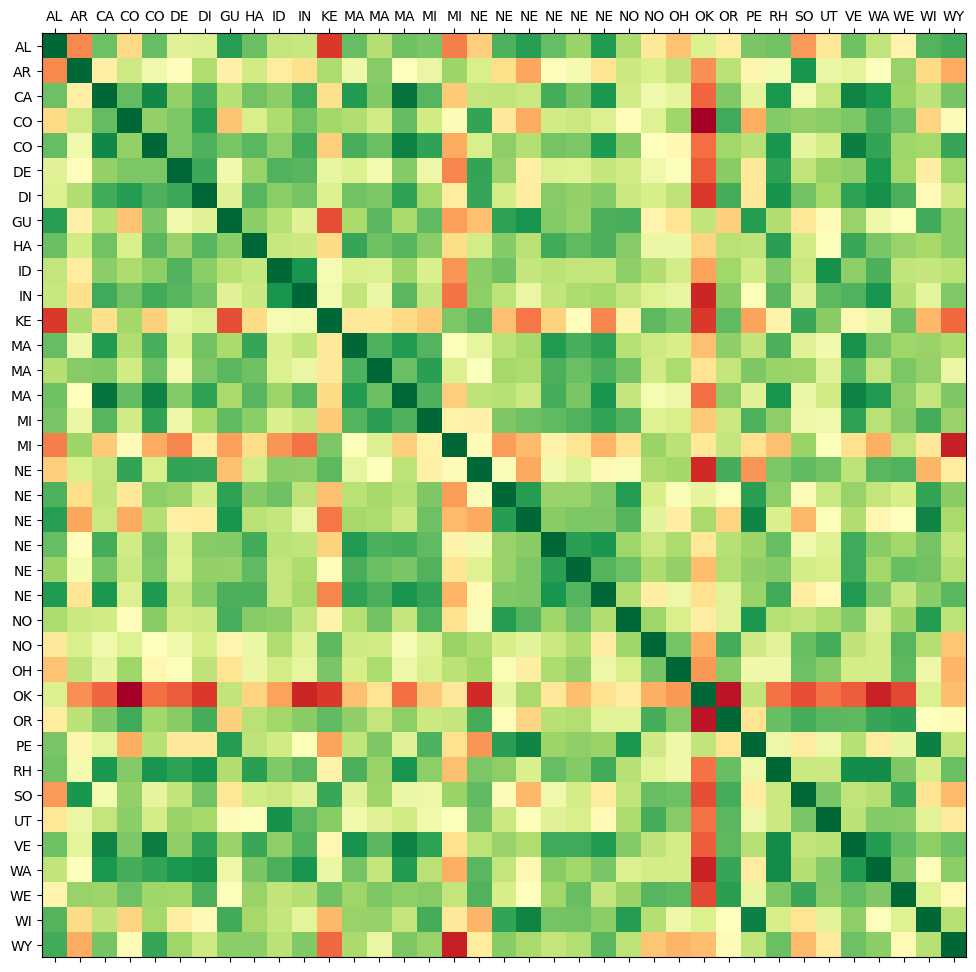

In [17]:
labels = [c[:2].upper() for c in min_wage_corr.columns]
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.matshow(min_wage_corr,cmap = plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)



In [53]:
import pandas as pd
import requests

web= requests.get('https://www.ssa.gov/international/coc-docs/states.html')

dfs = pd.read_html(web.text)


C:\Users\Shaya\AppData\Local\Temp\ipykernel_4940\384592020.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(web.text)


In [54]:
for df in dfs:
    print(df)

                       0   1
0                ALABAMA  AL
1                 ALASKA  AK
2         AMERICAN SAMOA  AS
3                ARIZONA  AZ
4               ARKANSAS  AR
5             CALIFORNIA  CA
6               COLORADO  CO
7            CONNECTICUT  CT
8               DELAWARE  DE
9   DISTRICT OF COLUMBIA  DC
10               FLORIDA  FL
11               GEORGIA  GA
12                  GUAM  GU
13                HAWAII  HI
14                 IDAHO  ID
15              ILLINOIS  IL
16               INDIANA  IN
17                  IOWA  IA
18                KANSAS  KS
19              KENTUCKY  KY
20             LOUISIANA  LA
21                 MAINE  ME
22              MARYLAND  MD
23         MASSACHUSETTS  MA
24              MICHIGAN  MI
25             MINNESOTA  MN
26           MISSISSIPPI  MS
27              MISSOURI  MO
28               MONTANA  MT
29              NEBRASKA  NE
30                NEVADA  NV
31         NEW HAMPSHIRE  NH
32            NEW JERSEY  NJ
33            

In [55]:
state_abbv = dfs[0]
state_abbv.head()

,0,1
0,ALABAMA,AL
1,ALASKA,AK
2,AMERICAN SAMOA,AS
3,ARIZONA,AZ
4,ARKANSAS,AR


In [56]:
state_abbv.to_csv('archive/state_abbv.csv',index=False)
state_abbv = pd.read_csv('archive/state_abbv.csv',index_col=0)
state_abbv.head()

,1
0,
ALABAMA,AL
ALASKA,AK
AMERICAN SAMOA,AS
ARIZONA,AZ
ARKANSAS,AR


In [ ]:
abbv_dict = state_abbv[['1']].to_dict()
abbv_dict = abbv_dict['1']
abbv_dict

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA IS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 'VIRGI

In [64]:
labels = [abbv_dict[c.upper()] for c in min_wage_corr.columns]
labels

['AK',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'GU',
 'HI',
 'ID',
 'IN',
 'KY',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SD',
 'UT',
 'VT',
 'WA',
 'WV',
 'WI',
 'WY']

[Text(0, 1, 'AK'),
 Text(1, 1, 'AR'),
 Text(2, 1, 'CA'),
 Text(3, 1, 'CO'),
 Text(4, 1, 'CT'),
 Text(5, 1, 'DE'),
 Text(6, 1, 'DC'),
 Text(7, 1, 'GU'),
 Text(8, 1, 'HI'),
 Text(9, 1, 'ID'),
 Text(10, 1, 'IN'),
 Text(11, 1, 'KY'),
 Text(12, 1, 'ME'),
 Text(13, 1, 'MD'),
 Text(14, 1, 'MA'),
 Text(15, 1, 'MI'),
 Text(16, 1, 'MN'),
 Text(17, 1, 'NE'),
 Text(18, 1, 'NV'),
 Text(19, 1, 'NH'),
 Text(20, 1, 'NJ'),
 Text(21, 1, 'NM'),
 Text(22, 1, 'NY'),
 Text(23, 1, 'NC'),
 Text(24, 1, 'ND'),
 Text(25, 1, 'OH'),
 Text(26, 1, 'OK'),
 Text(27, 1, 'OR'),
 Text(28, 1, 'PA'),
 Text(29, 1, 'RI'),
 Text(30, 1, 'SD'),
 Text(31, 1, 'UT'),
 Text(32, 1, 'VT'),
 Text(33, 1, 'WA'),
 Text(34, 1, 'WV'),
 Text(35, 1, 'WI'),
 Text(36, 1, 'WY')]

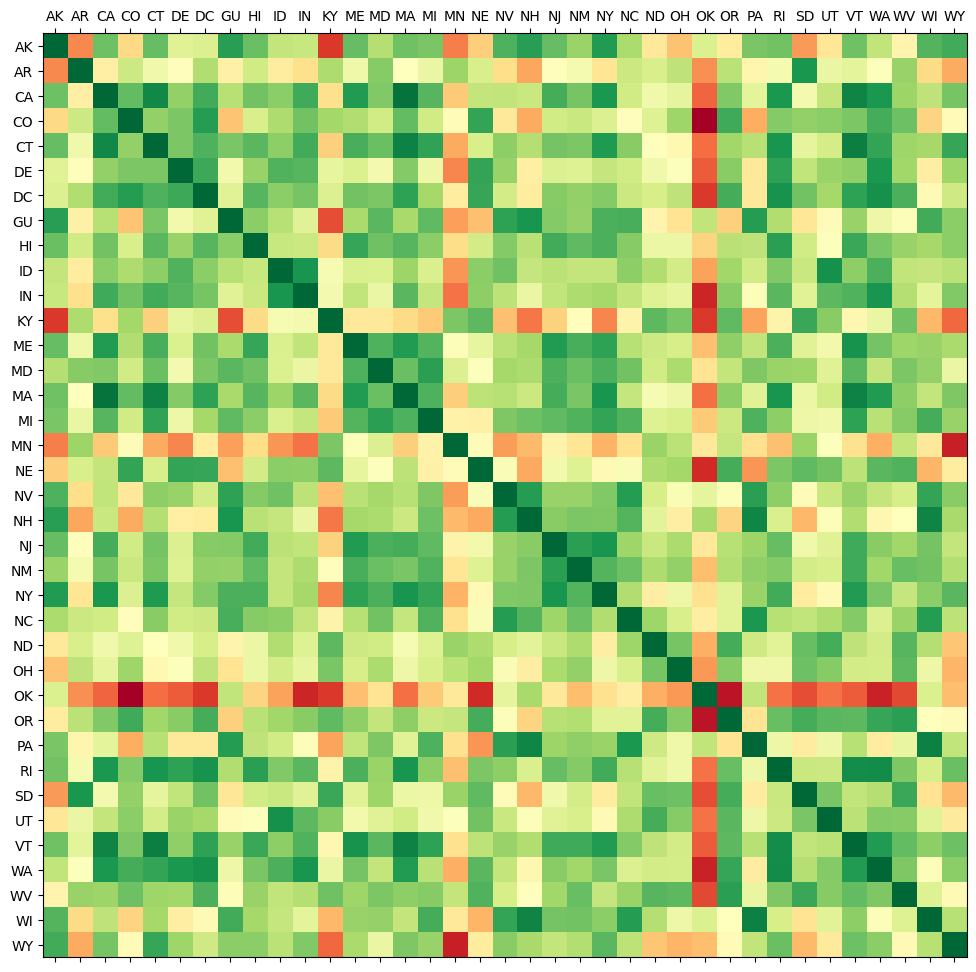

In [65]:
labels = [abbv_dict[c.upper()] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)
ax.matshow(min_wage_corr,cmap = plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)